## **Hipótesis del Proyecto**

### **1) Los objetivos marcados por cada equipo al comienzo de la temporada pueden ser:**
1. **Ganar la Liga**  
2. **Quedar en puestos de la tabla que dan derecho a disputar:**
   - **Champions League** *(1.ª, 2.ª, 3.ª, 4.ª posición)*  
   - **Europa League** *(5.ª posición)*  
   - **Europa Conference League** *(6.ª posición)*  
3. **Quedar en puestos de permanencia de la categoría** *(Hasta la 16.ª posición)*  

---

## **Análisis del Proyecto**

### **2) Equipos con mejor desempeño en la temporada 2023-2024**  
Se analizarán cuántos goles necesitan **marcar** y **no encajar** para alcanzar sus objetivos:

1. **Diferencia de goles**  
   - Comparación general de la diferencia de goles entre equipos.

2. **Diferencia de goles por partido**  
   - Análisis detallado de la diferencia de goles en cada partido.  

3. **Promedio de goles**  
   - Cálculo del promedio de goles anotados por cada equipo.  

4. **Resultados de partidos ganados, empatados y perdidos**  
   - Comparación entre equipos en partidos **en Casa** y **Fuera de Casa**.  

---

## **Resultado del Proyecto**

### **3) Objetivo final**  
Determinar:  
- Cuántos goles deben **marcar** y **no encajar**.  
- Cuántos **puntos** necesitan para **alcanzar sus objetivos** de la temporada.


In [1]:
# Estructura del Proyecto:

# src/
# │-- team_logos/
# │    ├── Real_Madrid.png
# │    ├── Barcelona.png
# │    ├── Sevilla.png
# │-- notebooks/
# |    ├── Football_Matches.ipynb
# |-- utils/
# |    ├── functions.py
# |    ├── objetivos_equipos.py
# |-- data/
#      ├── LigaEspanola2023-2024-Resultados.xlsx
#      ├── objetivos_equipos.csv


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import importlib
import sys
import os

# Añadir la ruta relativa al sys.path
sys.path.append(os.path.abspath("../utils/"))

# Importar el módulo functions
import functions
importlib.reload(functions)  # Recargar el módulo si ha sido modificado

# Importar funciones específicas
from functions import diferencia_goles_acumulada, plot_victorias_derrotas, show_team_logos, mostrar_df_con_logos

print("Módulo functions importado correctamente.")

Módulo functions importado correctamente.


### HIPÓTESIS

In [17]:
# Definimos las variables que vamos a necesitar durante el desarrollo del Proyecto
folder_path = '../team_logos/'
temporada = 2023

In [4]:
# Cargar el archivo Excel para generar el Dataframe
file_path = '../data/LigaEspanola2023-2024-Resultados.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

                GF  GC  Diferencia de Goles
Real Madrid     71  22                   49
Barcelona       68  39                   29
Girona          69  40                   29
Atl. Madrid     62  39                   23
Ath Bilbao      53  33                   20
Real Sociedad   46  35                   11
Betis           41  39                    2
Valencia        37  38                   -1
Villarreal      54  55                   -1
Getafe          41  45                   -4
Sevilla         42  46                   -4
Alaves          31  38                   -7
Las Palmas      30  41                  -11
Osasuna         37  49                  -12
Mallorca        27  39                  -12
Celta Vigo      37  50                  -13
Rayo Vallecano  27  42                  -15
Cadiz CF        23  46                  -23
Granada CF      36  61                  -25
Almeria         32  67                  -35


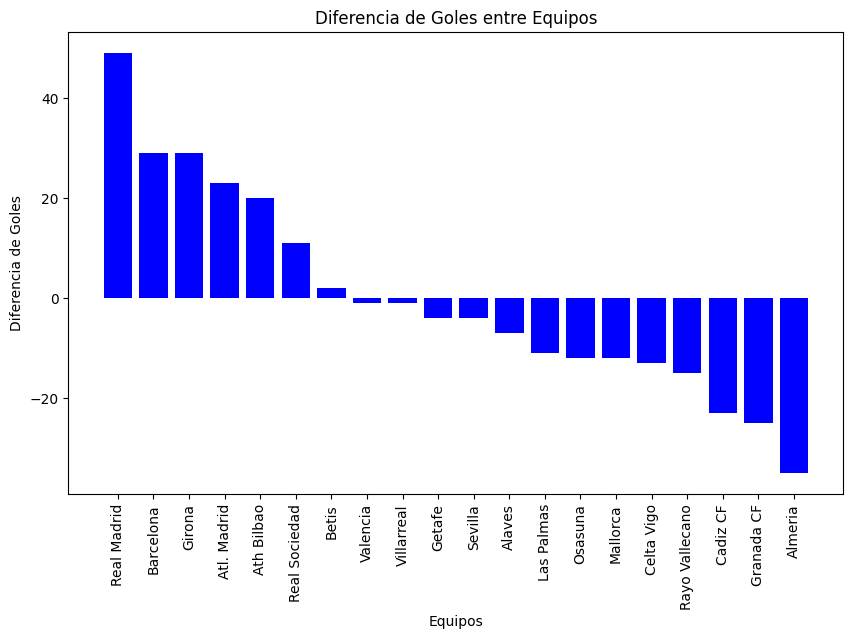

In [5]:
# 2.1) Ver la diferencia de goles entre equipos.

# Calcular Goles a Favor (GF) y Goles en Contra (GC) para cada equipo
home_stats = df.groupby("Home Team").agg(GF_home=("Home Score", "sum"), GC_home=("Away Score", "sum"))
away_stats = df.groupby("Away Team").agg(GF_away=("Away Score", "sum"), GC_away=("Home Score", "sum"))

# Combinar estadísticas de local y visitante
team_stats = pd.concat([home_stats, away_stats], axis=1).fillna(0)

# Calcular goles totales a favor y en contra
team_stats["GF"] = team_stats["GF_home"] + team_stats["GF_away"]
team_stats["GC"] = team_stats["GC_home"] + team_stats["GC_away"]

# Calcular la diferencia de goles
team_stats["Diferencia de Goles"] = team_stats["GF"] - team_stats["GC"]

# Seleccionar solo las columnas necesarias
final_stats = team_stats[["GF", "GC", "Diferencia de Goles"]].sort_values(by="Diferencia de Goles", ascending=False)

# Mostrar el resultado
print(final_stats)

# Visualización de la diferencia de goles
plt.figure(figsize=(10, 6))
plt.bar(final_stats.index, final_stats["Diferencia de Goles"], color="blue")
plt.xticks(rotation=90)
plt.xlabel("Equipos")
plt.ylabel("Diferencia de Goles")
plt.title("Diferencia de Goles entre Equipos")
plt.show()


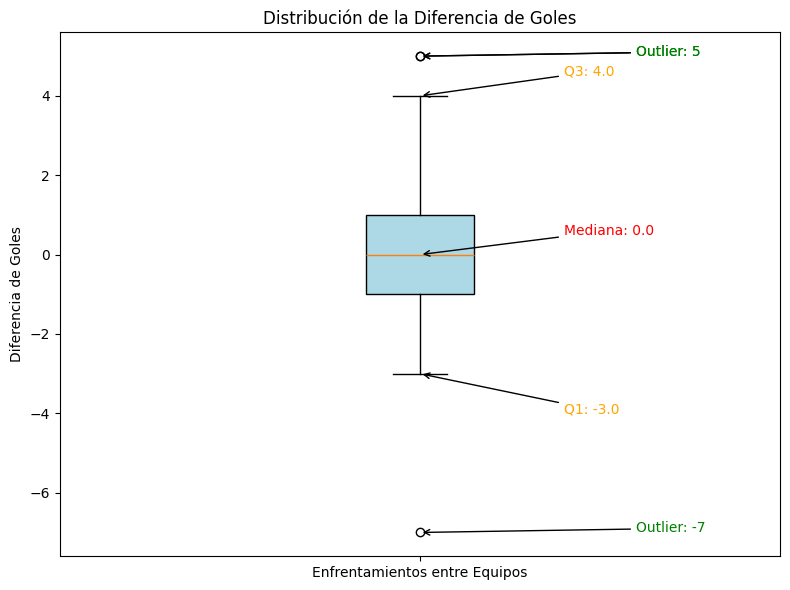

Límite inferior: -4.0, Límite superior: 4.0
Partidos con diferencia de goles como outliers:


,Date,Home Team,Away Team,Home Score,Away Score,Diferencia de Goles
88,2024-02-17,Atl. Madrid,Las Palmas,5,0,5
286,2023-09-16,Barcelona,Betis,5,0,5
300,2023-08-28,Rayo Vallecano,Atl. Madrid,0,7,-7


In [6]:
# 2.2) Ver la diferencia de goles por partido entre equipos.

# Calcular la diferencia de goles
df["Diferencia de Goles"] = df["Home Score"] - df["Away Score"]

# Crear el Boxplot
fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(df["Diferencia de Goles"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Extraer valores estadísticos del boxplot
whiskers = [item.get_ydata() for item in box['whiskers']]  # Límites de los bigotes
caps = [item.get_ydata() for item in box['caps']]          # Extremos de los bigotes
median = box['medians'][0].get_ydata()[0]                 # Mediana
q1 = whiskers[0][1]                                       # Primer cuartil (Q1)
q3 = whiskers[1][1]                                       # Tercer cuartil (Q3)

# Anotar la mediana
ax.annotate(f"Mediana: {median}", xy=(1, median), xytext=(1.2, median + 0.5),
            arrowprops=dict(facecolor="red", arrowstyle="->"), fontsize=10, color="red")

# Anotar el rango intercuartil (Q1 - Q3)
ax.annotate(f"Q1: {q1}", xy=(1, q1), xytext=(1.2, q1 - 1),
            arrowprops=dict(facecolor="orange", arrowstyle="->"), fontsize=10, color="orange")
ax.annotate(f"Q3: {q3}", xy=(1, q3), xytext=(1.2, q3 + 0.5),
            arrowprops=dict(facecolor="orange", arrowstyle="->"), fontsize=10, color="orange")

# Anotar los outliers (fuera de los bigotes)
for flier in box['fliers'][0].get_ydata():
    ax.annotate(f"Outlier: {flier}", xy=(1, flier), xytext=(1.3, flier),
                arrowprops=dict(facecolor="green", arrowstyle="->"), fontsize=10, color="green")

# Configuración del gráfico
plt.title("Distribución de la Diferencia de Goles")
plt.ylabel("Diferencia de Goles")
plt.xticks([1], ["Enfrentamientos entre Equipos"])
plt.tight_layout()
plt.show()

# Calcular el rango intercuartil (IQR)
Q1 = df["Diferencia de Goles"].quantile(0.25)
Q3 = df["Diferencia de Goles"].quantile(0.75)
IQR = Q3 - Q1

# Los valores que caen dentro de 1.5 veces el IQR alrededor de Q1 y Q3 son considerados normales.
# Los valores que están más allá de estos límites se consideran anómalos (outliers).
# Definir los límites de los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

# Filtrar los partidos que son outliers
outliers = df[(df["Diferencia de Goles"] < limite_inferior) | (df["Diferencia de Goles"] > limite_superior)]

# Mostrar los partidos outliers
print("Partidos con diferencia de goles como outliers:")
outliers[["Date", "Home Team", "Away Team", "Home Score", "Away Score", "Diferencia de Goles"]]


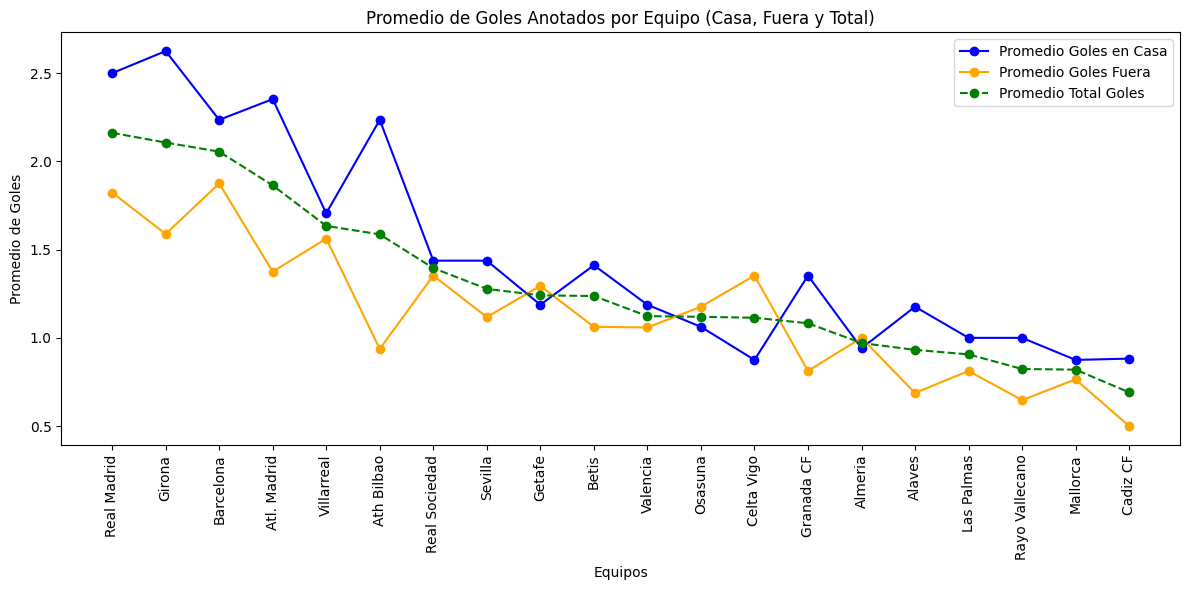

In [7]:
# 2.3) Ver el promedio de goles de los equipos.

# Calcular promedio de goles anotados por equipo
home_avg_goals = df.groupby("Home Team")["Home Score"].mean().rename("Promedio Goles en Casa")
away_avg_goals = df.groupby("Away Team")["Away Score"].mean().rename("Promedio Goles Fuera")

# Combinar los promedios en un solo DataFrame
avg_goals = pd.concat([home_avg_goals, away_avg_goals], axis=1).fillna(0)

# Calcular el promedio general de goles por equipo
avg_goals["Promedio Total Goles"] = (avg_goals["Promedio Goles en Casa"] + avg_goals["Promedio Goles Fuera"]) / 2

# Ordenar por promedio general
avg_goals = avg_goals.sort_values(by="Promedio Total Goles", ascending=False)

# Gráfico de líneas
plt.figure(figsize=(12, 6))

plt.plot(avg_goals.index, avg_goals["Promedio Goles en Casa"], marker='o', label="Promedio Goles en Casa", color='blue')
plt.plot(avg_goals.index, avg_goals["Promedio Goles Fuera"], marker='o', label="Promedio Goles Fuera", color='orange')
plt.plot(avg_goals.index, avg_goals["Promedio Total Goles"], marker='o', label="Promedio Total Goles", color='green', linestyle='--')

plt.xticks(rotation=90)
plt.xlabel("Equipos")
plt.ylabel("Promedio de Goles")
plt.title("Promedio de Goles Anotados por Equipo (Casa, Fuera y Total)")
plt.legend()
plt.tight_layout()
plt.show()


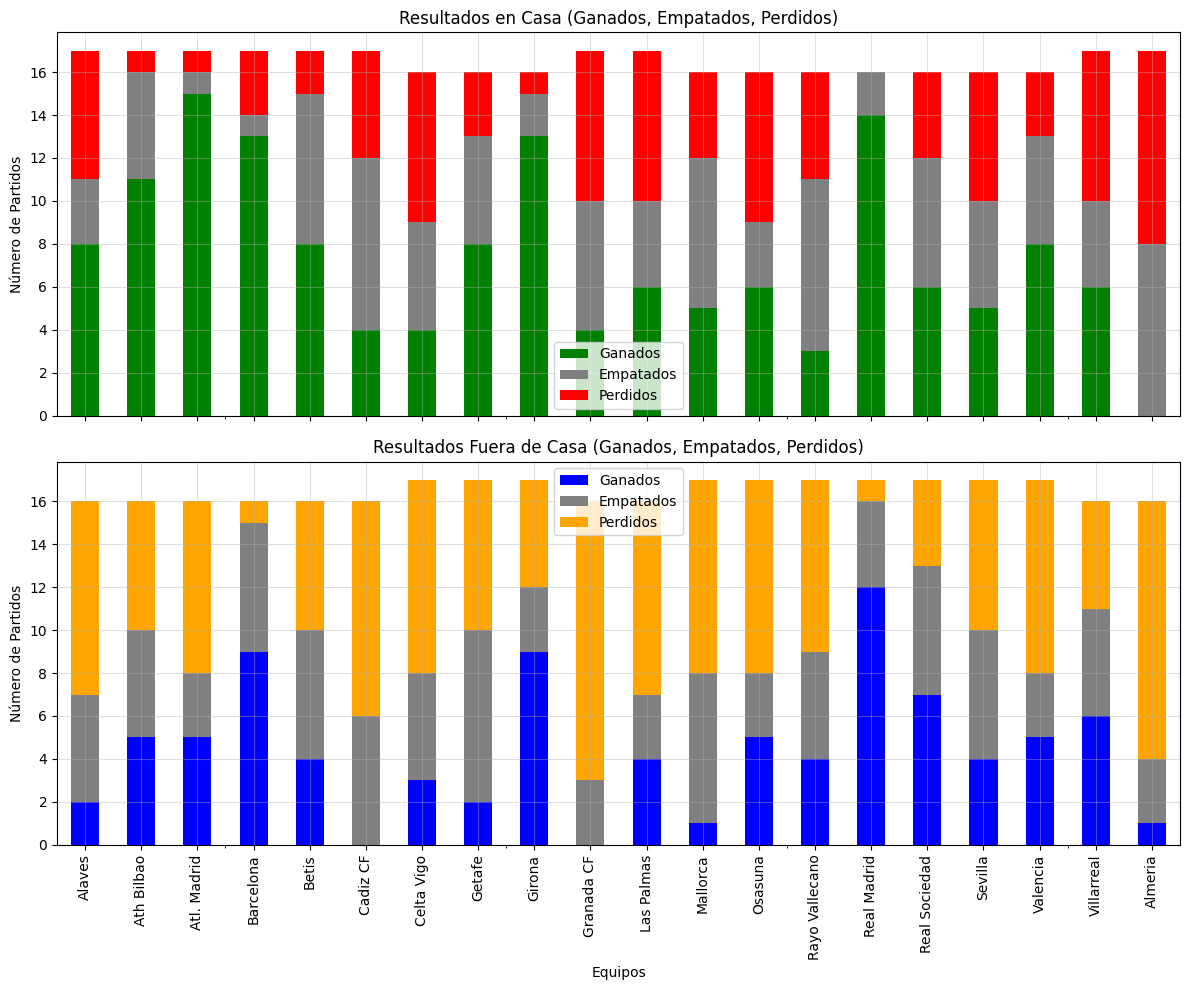

In [8]:
# 1.4) Ver la diferencia de partidos ganados / empatados / perdidos entre equipos en Casa y Fuera de Casa.

# Calcular resultados en Casa y Fuera
casa_ganados = df[df["Home Score"] > df["Away Score"]].groupby("Home Team").size().rename("Ganados en Casa")
fuera_ganados = df[df["Away Score"] > df["Home Score"]].groupby("Away Team").size().rename("Ganados Fuera")

casa_perdidos = df[df["Home Score"] < df["Away Score"]].groupby("Home Team").size().rename("Perdidos en Casa")
fuera_perdidos = df[df["Away Score"] < df["Home Score"]].groupby("Away Team").size().rename("Perdidos Fuera")

casa_empatados = df[df["Home Score"] == df["Away Score"]].groupby("Home Team").size().rename("Empatados en Casa")
fuera_empatados = df[df["Home Score"] == df["Away Score"]].groupby("Away Team").size().rename("Empatados Fuera")

# Combinar resultados en un DataFrame
results = pd.concat([casa_ganados, fuera_ganados, casa_perdidos, fuera_perdidos, casa_empatados, fuera_empatados], axis=1).fillna(0)

# Visualización
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de barras para Casa y Fuera
results[["Ganados en Casa", "Empatados en Casa", "Perdidos en Casa"]].plot(kind="bar", stacked=True, ax=ax[0], color=["green", "gray", "red"])
results[["Ganados Fuera", "Empatados Fuera", "Perdidos Fuera"]].plot(kind="bar", stacked=True, ax=ax[1], color=["blue", "gray", "orange"])

# Configuraciones para los subplots (Casa y Fuera)
titles = ["Resultados en Casa (Ganados, Empatados, Perdidos)", 
          "Resultados Fuera de Casa (Ganados, Empatados, Perdidos)"]

for i, ax_i in enumerate(ax):
    ax_i.set_title(titles[i])
    ax_i.set_ylabel("Número de Partidos")
    ax_i.legend(["Ganados", "Empatados", "Perdidos"])
    ax_i.grid(alpha=0.4)

# Configuraciones finales
plt.xticks(rotation=90)
plt.xlabel("Equipos")
plt.tight_layout()
plt.show()


In [9]:
file_csv = '../data/objetivos_equipos.csv'
df_objetivos = pd.read_csv(file_csv)
df_objetivos

,Equipo,Objetivo
0,Alaves,Permanencia
1,Almeria,Permanencia
2,Ath Bilbao,Europa League
3,Atl. Madrid,Liga
4,Barcelona,Liga
5,Betis,Conference League
6,Cadiz CF,Permanencia
7,Celta Vigo,Conference League
8,Getafe,Conference League
9,Girona,Conference League


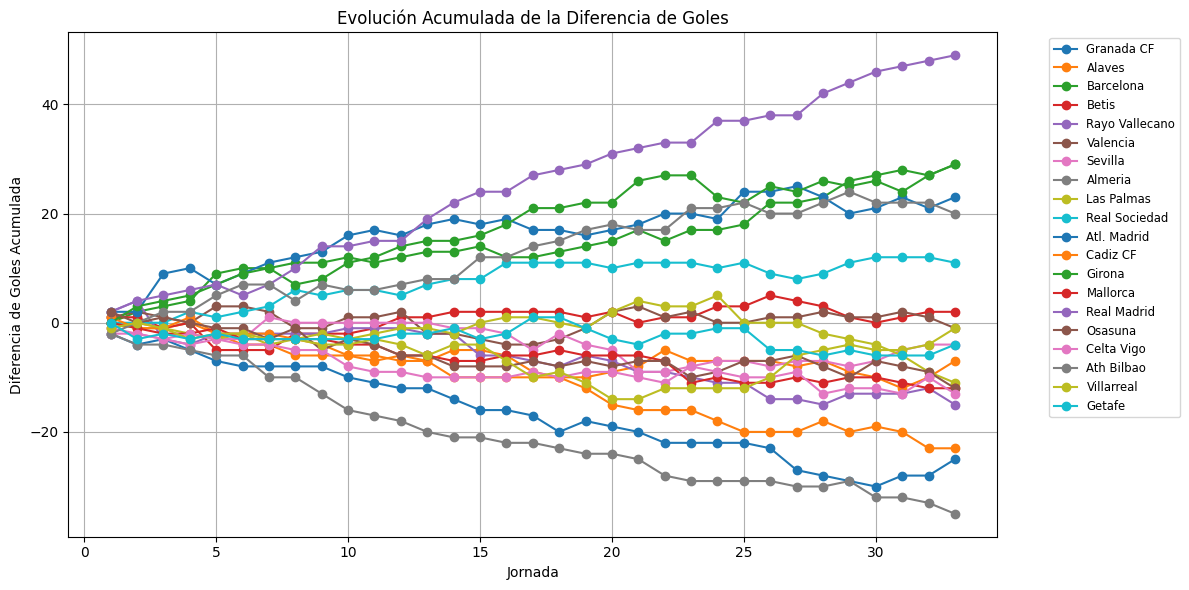

In [10]:
# Calcular diferencia de goles para el equipo local y visitante
df["Home_GD"] = df["Home Score"] - df["Away Score"]
df["Away_GD"] = df["Away Score"] - df["Home Score"]

# Crear un nuevo DataFrame con ambos equipos y su diferencia de goles
home_df = df[["Round", "Home Team", "Home_GD"]].rename(columns={"Home Team": "Team", "Home_GD": "Diferencia_Goles"})
away_df = df[["Round", "Away Team", "Away_GD"]].rename(columns={"Away Team": "Team", "Away_GD": "Diferencia_Goles"})

# Concatenar ambos DataFrames
combined_df = pd.concat([home_df, away_df], axis=0)

# Ordenar por jornadas (Round) para calcular la diferencia acumulada
combined_df = combined_df.sort_values(by="Round")

# Calcular la diferencia acumulada de goles para cada equipo
combined_df["Diferencia_Goles_Acum"] = combined_df.groupby("Team")["Diferencia_Goles"].cumsum()

# Visualizar la evolución acumulada de la diferencia de goles
plt.figure(figsize=(12, 6))

for team in combined_df["Team"].unique():
    team_data = combined_df[combined_df["Team"] == team]
    plt.plot(team_data["Round"], team_data["Diferencia_Goles_Acum"], marker="o", label=team)

plt.title("Evolución Acumulada de la Diferencia de Goles")
plt.xlabel("Jornada")
plt.ylabel("Diferencia de Goles Acumulada")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.grid()
plt.show()


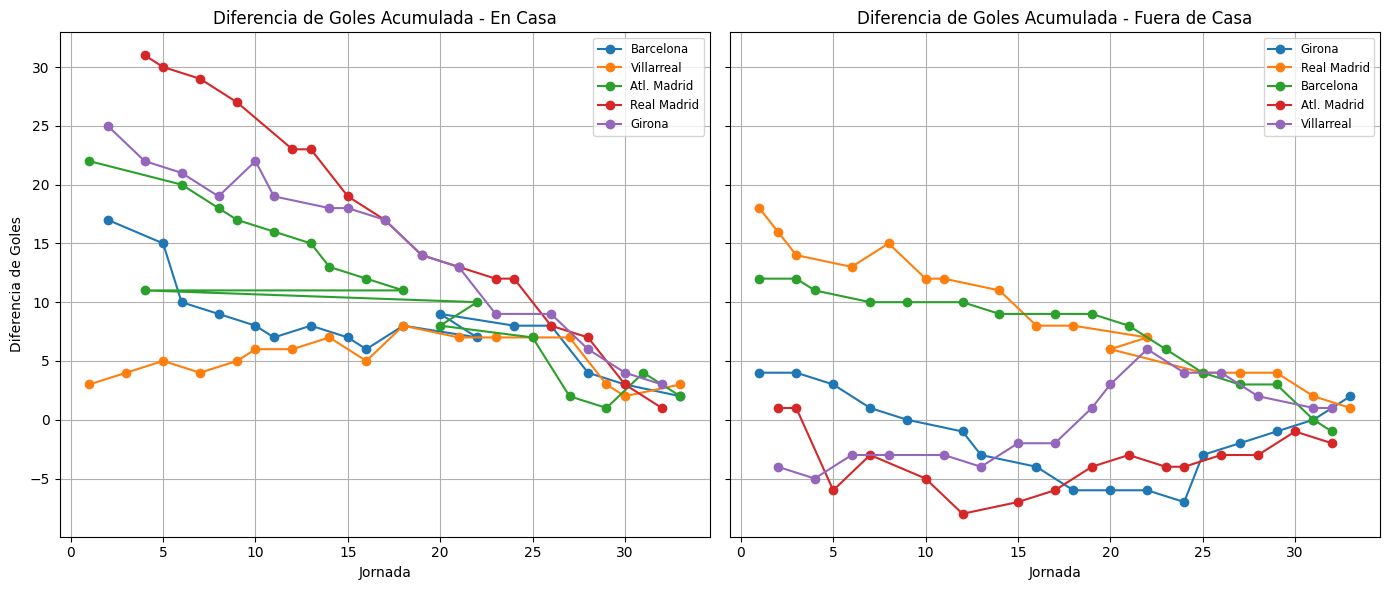

In [11]:
# Calcular los goles anotados por equipo en casa y fuera
home_goals = df.groupby("Home Team")["Home Score"].sum()
away_goals = df.groupby("Away Team")["Away Score"].sum()

# Sumar los goles totales por equipo
total_goals = (home_goals + away_goals).groupby(level=0).sum()

# Obtener los equipos con más goles
equipos_seleccionados = total_goals.sort_values(ascending=False).head(5).index.tolist()

# Llamar a la función
diferencia_goles_acumulada(df, plt, teams=equipos_seleccionados)


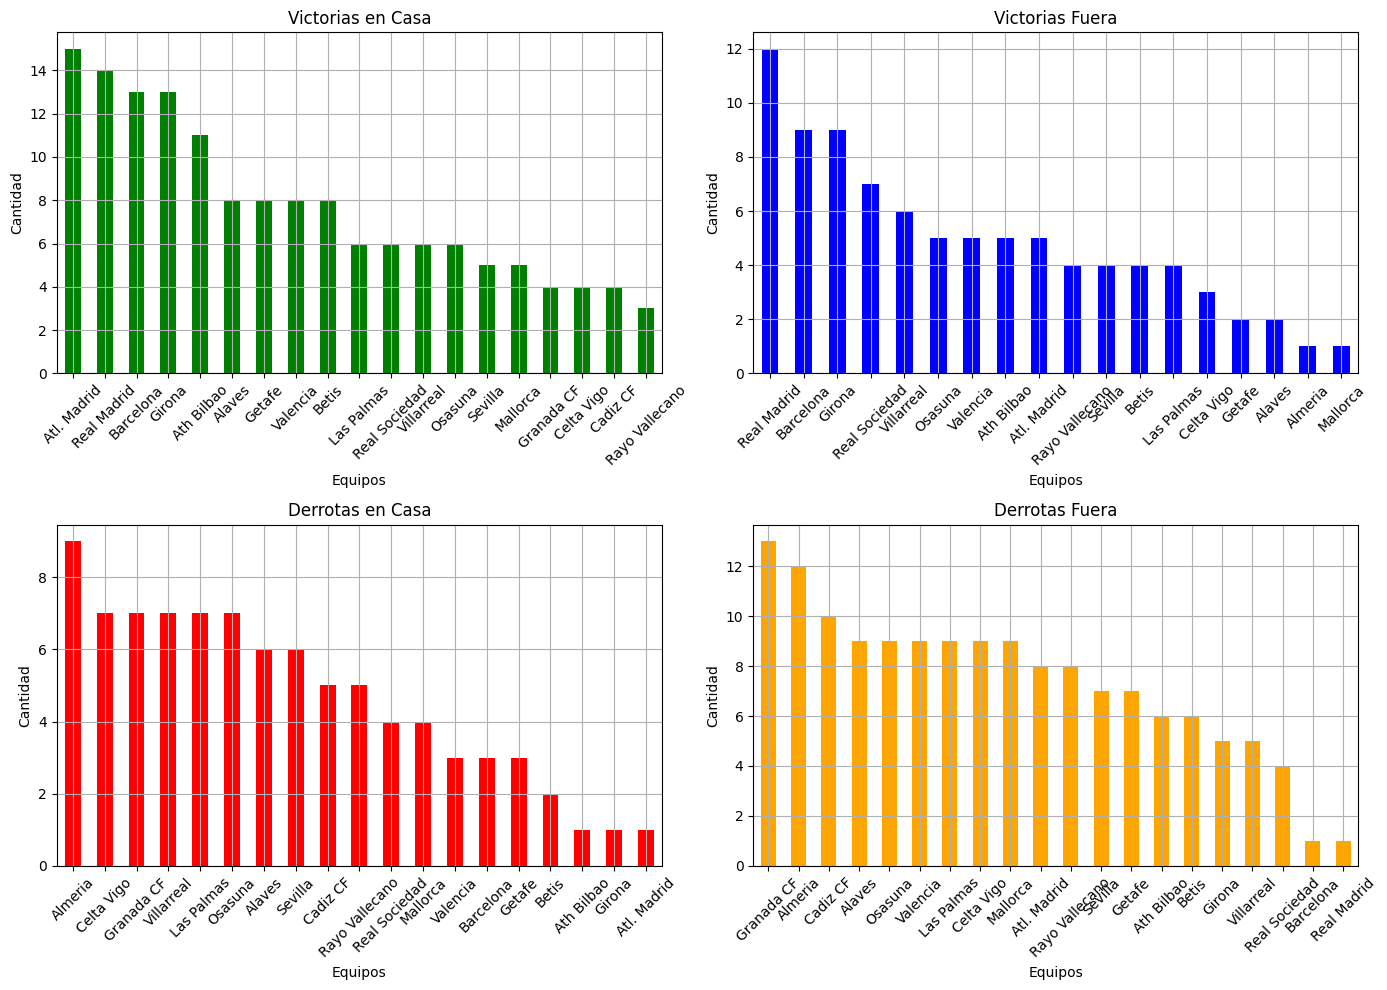

In [12]:
# 1. Contar victorias en casa
casa_ganados = df[df["Home Score"] > df["Away Score"]].groupby("Home Team").size()

# 2. Contar victorias fuera de casa
fuera_ganados = df[df["Away Score"] > df["Home Score"]].groupby("Away Team").size()

# 3. Contar derrotas en casa
casa_perdidos = df[df["Home Score"] < df["Away Score"]].groupby("Home Team").size()

# 4. Contar derrotas fuera de casa
fuera_perdidos = df[df["Away Score"] < df["Home Score"]].groupby("Away Team").size()

# Odenar los equipos con más victorias o derrotas
casa_ganados = casa_ganados.sort_values(ascending=False)
fuera_ganados = fuera_ganados.sort_values(ascending=False)
casa_perdidos = casa_perdidos.sort_values(ascending=False)
fuera_perdidos = fuera_perdidos.sort_values(ascending=False)

plot_victorias_derrotas(casa_ganados,fuera_ganados,casa_perdidos,fuera_perdidos,plt)


### RESULTADO FINAL

In [13]:
# Cargar los datos de resultados y objetivos
file_path = '../data/LigaEspanola2023-2024-Resultados.xlsx'
df_resultados = pd.read_excel(file_path, sheet_name=0)

# Función para calcular puntos por partido
def calcular_puntos(row):
    if row["Home Score"] > row["Away Score"]:
        return 3, 0  # Victoria local, derrota visitante
    elif row["Home Score"] < row["Away Score"]:
        return 0, 3  # Derrota local, victoria visitante
    else:
        return 1, 1  # Empate para ambos

# Aplicar la función para calcular puntos
df_resultados[["Puntos_Home", "Puntos_Away"]] = df_resultados.apply(
    lambda row: pd.Series(calcular_puntos(row)), axis=1
)

# Agrupar estadísticas por equipo
equipos_home = df_resultados.groupby("Home Team").agg(
    Puntos_Home=("Puntos_Home", "sum"),
    Goles_Favor_Home=("Home Score", "sum"),
    Goles_Contra_Home=("Away Score", "sum")
)

equipos_away = df_resultados.groupby("Away Team").agg(
    Puntos_Away=("Puntos_Away", "sum"),
    Goles_Favor_Away=("Away Score", "sum"),
    Goles_Contra_Away=("Home Score", "sum")
)

# Combinar las estadísticas de casa y fuera
df_estadisticas = pd.concat([equipos_home, equipos_away], axis=1).fillna(0)

# Sumar estadísticas totales
df_estadisticas["Puntos_Totales"] = df_estadisticas["Puntos_Home"] + df_estadisticas["Puntos_Away"]
df_estadisticas["Goles_Favor_Totales"] = df_estadisticas["Goles_Favor_Home"] + df_estadisticas["Goles_Favor_Away"]
df_estadisticas["Goles_Contra_Totales"] = df_estadisticas["Goles_Contra_Home"] + df_estadisticas["Goles_Contra_Away"]

# Resetear índice para combinar con objetivos
df_estadisticas = df_estadisticas.reset_index().rename(columns={"index": "Equipo"})

# Combinar las estadísticas con los objetivos
df_final = pd.merge(df_estadisticas, df_objetivos, on="Equipo", how="left")

# Inicializar la columna "Cumple_Objetivo" con "No"
df_final["Cumple_Objetivo"] = "No"

# Filtrar equipos cuyo objetivo sea "Liga"
equipos_liga = df_final[df_final["Objetivo"] == "Liga"]

# Encontrar el equipo con más puntos entre los equipos con el objetivo "Liga"
equipo_ganador = equipos_liga.loc[equipos_liga["Puntos_Totales"].idxmax()]["Equipo"]

# Asignar "Sí" solo al equipo ganador y "No" al resto
df_final["Cumple_Objetivo"] = df_final.apply(
    lambda row: "Sí" if row["Equipo"] == equipo_ganador and row["Objetivo"] == "Liga"
    else ("No" if row["Objetivo"] == "Liga" else row["Cumple_Objetivo"]),
    axis=1
)

# 1. Ordenar por Puntos Totales y resetear índice
df_final = df_final.sort_values(by="Puntos_Totales", ascending=False).reset_index(drop=True)

# 2. Añadir columna de posición
df_final.insert(0, "Posicion", df_final.index + 1)

# 3. Actualizar Cumple_Objetivo con la nueva lógica
def evaluar_objetivo(row):
    posicion = row["Posicion"]
    objetivo = row["Objetivo"]
    
    # Definir criterios para cumplir el objetivo
    if objetivo == "Liga" and posicion == 1:
        return "Sí"
    elif objetivo == "Champions League" and posicion <= 4:  # Posiciones 1-4
        return "Sí"
    elif objetivo == "Europa League" and posicion <= 5:  # Posiciones 1-5
        return "Sí"
    elif objetivo == "Conference League" and posicion <= 6:  # Posiciones 1-6
        return "Sí"
    elif objetivo == "Permanencia" and posicion <= 16:  # Posiciones 1-16
        return "Sí"
    else:
        return "No"

# Aplicar la función para evaluar si los equipos cumplen su objetivo
df_final["Cumple_Objetivo"] = df_final.apply(evaluar_objetivo, axis=1)

# Mostrar el resultado
print("\nEstadísticas Finales con Evaluación de Objetivos:")
df_final[["Posicion","Equipo", "Puntos_Totales", "Goles_Favor_Totales", "Goles_Contra_Totales", "Objetivo", "Cumple_Objetivo"]].sort_values(by="Puntos_Totales", ascending=False)




Estadísticas Finales con Evaluación de Objetivos:


,Posicion,Equipo,Puntos_Totales,Goles_Favor_Totales,Goles_Contra_Totales,Objetivo,Cumple_Objetivo
0,1,Real Madrid,84,71,22,Liga,Sí
1,2,Barcelona,73,68,39,Liga,No
2,3,Girona,71,69,40,Conference League,Sí
3,4,Atl. Madrid,64,62,39,Liga,No
4,5,Ath Bilbao,58,53,33,Europa League,Sí
5,6,Real Sociedad,51,46,35,Europa League,No
6,7,Betis,49,41,39,Conference League,No
7,8,Valencia,47,37,38,Champions League,No
8,9,Villarreal,45,54,55,Champions League,No
9,10,Getafe,43,41,45,Conference League,No


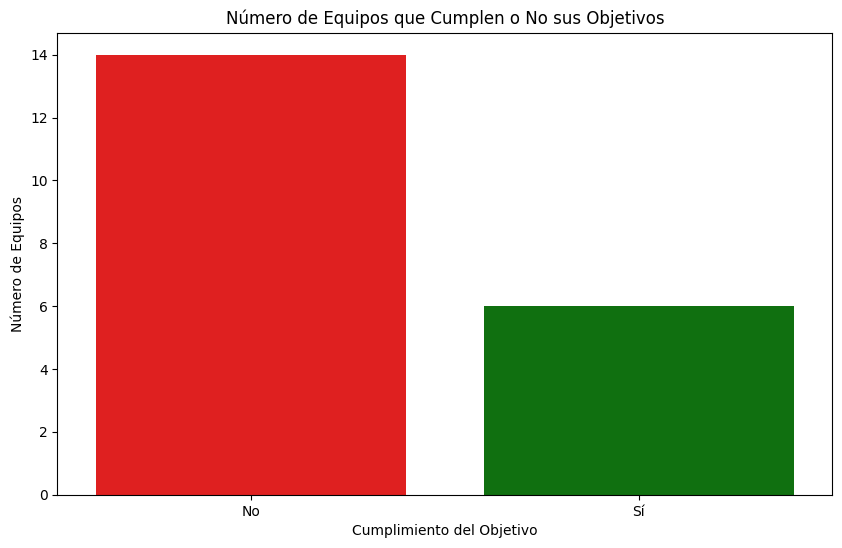

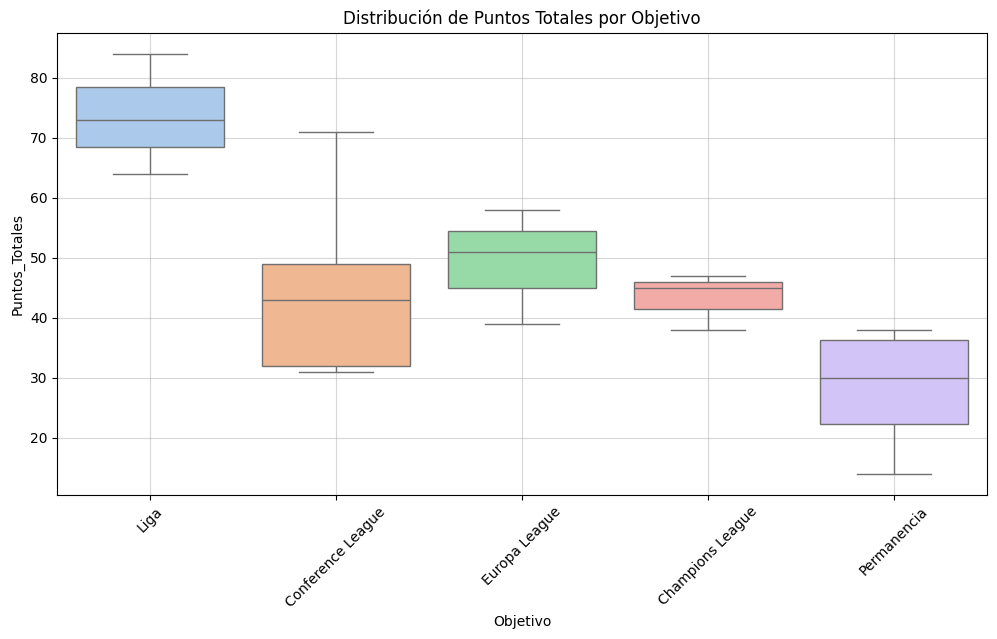

Equipos que han cumplido sus objetivos:
    Posicion          Equipo  Puntos_Totales           Objetivo
0          1     Real Madrid              84               Liga
2          3          Girona              71  Conference League
4          5      Ath Bilbao              58      Europa League
11        12          Alaves              38        Permanencia
13        14      Las Palmas              37        Permanencia
14        15  Rayo Vallecano              34        Permanencia

Equipos que no han cumplido sus objetivos:
    Posicion         Equipo  Puntos_Totales           Objetivo
1          2      Barcelona              73               Liga
3          4    Atl. Madrid              64               Liga
5          6  Real Sociedad              51      Europa League
6          7          Betis              49  Conference League
7          8       Valencia              47   Champions League
8          9     Villarreal              45   Champions League
9         10         Getafe

In [14]:
# 1. Gráfico de barras: Equipos que cumplen o no su objetivo
plt.figure(figsize=(10, 6))
cumplen = df_final["Cumple_Objetivo"].value_counts()
sns.barplot(
    x=cumplen.index, 
    y=cumplen.values, 
    palette={"Sí": "green", "No": "red"},
    hue=cumplen.index,  # Asigna la variable al hue
    legend=False        # Evita la leyenda si no se necesita
)
plt.title("Número de Equipos que Cumplen o No sus Objetivos")
plt.xlabel("Cumplimiento del Objetivo")
plt.ylabel("Número de Equipos")
plt.show()

# 2. Boxplot: Distribución de Puntos Totales por Objetivo
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Objetivo",
    y="Puntos_Totales",
    data=df_final,
    hue="Objetivo",  # Asigna la variable al hue
    palette="pastel",
    legend=False     # Evita la leyenda si no se necesita
)
plt.title("Distribución de Puntos Totales por Objetivo")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

# 3. Tabla resumen: Equipos que cumplen su objetivo
equipos_cumplen = df_final[df_final["Cumple_Objetivo"] == "Sí"]
print("Equipos que han cumplido sus objetivos:")
print(equipos_cumplen[["Posicion", "Equipo", "Puntos_Totales", "Objetivo"]])

# 4. Tabla resumen: Equipos que no cumplen su objetivo
equipos_no_cumplen = df_final[df_final["Cumple_Objetivo"] == "No"]
print("\nEquipos que no han cumplido sus objetivos:")
print(equipos_no_cumplen[["Posicion", "Equipo", "Puntos_Totales", "Objetivo"]])


In [15]:
import requests
from bs4 import BeautifulSoup
import time

# URL de la página de equipos de LaLiga en Transfermarkt
url = "https://www.transfermarkt.com/laliga/startseite/wettbewerb/ES1/plus/?saison_id="+str(temporada)

# Encabezados (para evitar bloqueos del servidor)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}

# Hacer la solicitud HTTP
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Crear una carpeta para guardar los logos
os.makedirs(folder_path, exist_ok=True)

# Buscar todas las etiquetas 'td' con clase 'zentriert'
td_tags = soup.find_all("td", {"class": "zentriert"})

# Filtrar las imágenes dentro de las etiquetas 'td'
for td in td_tags:
    img_tag = td.find("img", {"class": "tiny_wappen"})
    if img_tag and img_tag.get("src"):
        image_url = img_tag["src"]
        team_name = img_tag.get("alt", "Equipo_desconocido").replace(" ", "_").replace("/", "_")

        # Descargar y guardar la imagen
        print(f"Descargando logo de {team_name} - {image_url}")
        try:
            img_data = requests.get(image_url).content
            with open(f"{folder_path}/{team_name}.png", "wb") as f:
                f.write(img_data)
            time.sleep(2)  # Pausa de 2 segundos por cada descarga
        except Exception as e:
            print(f"Error al descargar {team_name}: {e}")

print("Descarga de logos completada correctamente.")


Descargando logo de Real_Madrid - https://tmssl.akamaized.net//images/wappen/tiny/418.png?lm=1729684474
Descargando logo de FC_Barcelona - https://tmssl.akamaized.net//images/wappen/tiny/131.png?lm=1406739548
Descargando logo de Real_Sociedad - https://tmssl.akamaized.net//images/wappen/tiny/681.png?lm=1614795530
Descargando logo de Girona_FC - https://tmssl.akamaized.net//images/wappen/tiny/12321.png?lm=1730455718
Descargando logo de Athletic_Bilbao - https://tmssl.akamaized.net//images/wappen/tiny/621.png?lm=1695069038
Descargando logo de Villarreal_CF - https://tmssl.akamaized.net//images/wappen/tiny/1050.png?lm=1408655310
Descargando logo de Valencia_CF - https://tmssl.akamaized.net//images/wappen/tiny/1049.png?lm=1406966320
Descargando logo de Sevilla_FC - https://tmssl.akamaized.net//images/wappen/tiny/368.png?lm=1730896593
Descargando logo de Real_Betis_Balompié - https://tmssl.akamaized.net//images/wappen/tiny/150.png?lm=1663358526
Descargando logo de Celta_de_Vigo - https://tm

In [16]:
# Llamada a la función que muestra los logos
show_team_logos(folder_path, 20)